# Procesamiento de datos
Bienvenidos a este notebook sobre procesamiento de datos. En este ejercicio, exploraremos un conjunto de datos real proveniente de Airbnb en la ciudad de Nueva York. Nuestro objetivo será aprender cómo cargar, explorar, limpiar y transformar datos, para finalmente generar un conjunto de datos listo para análisis o modelado.

##Introducción
El procesamiento de datos es una parte fundamental en cualquier proyecto de análisis de datos o machine learning. Generalmente, los datos en su forma cruda no son adecuados para su análisis directo debido a problemas como valores faltantes, datos atípicos (outliers), inconsistencias y variables sin transformar. Este proceso incluye pasos de exploración inicial, limpieza, transformación, y, a veces, la creación de nuevas variables que mejoran el entendimiento del problema.

###Objetivos
En este notebook, aprenderemos a:

- Cargar un archivo CSV en un dataframe de pandas.
- Explorar el conjunto de datos y entender la función de cada campo.
- Realizar una limpieza básica para manejar valores faltantes y datos inconsistentes.
- Transformar datos para crear un conjunto listo para análisis.

#1: Carga de Datos
Comencemos cargando el archivo CSV y echando un vistazo a las primeras filas para conocer la estructura de nuestros datos.

Sube el archivo AB_NYC_2019.csv a la sección predeterminada de archivos de google colab.

Ejecuta el siguiente código. Si es necewsario, verifica la ruta del archivo.

In [1]:
# Importar la biblioteca pandas
import pandas as pd

# Cargar el archivo CSV en un dataframe
df_airbnb = pd.read_csv('/content/CC11_Dataset.csv')

# Mostrar las primeras filas del dataframe
df_airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

#2: Exploración Inicial
Para entender los datos, veamos una lista de todas las columnas y algunas estadísticas descriptivas.

In [2]:
# Información general sobre las columnas y tipos de datos
df_airbnb.info()

# Estadísticas descriptivas de las columnas numéricas
df_airbnb.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

##Entendiendo los campos
Para poder dar contexto a nuestros análisis, hay que conocer los campos que encontramos en el dataset de Airbnb NYC:

1. id: Identificador único del anuncio.

2. name: Nombre del listado en Airbnb.

3. host_id: Identificador único del anfitrión.

4. host_name: Nombre del anfitrión.

5. neighbourhood_group: La zona general en la ciudad donde se ubica el listado (por ejemplo, Manhattan, Brooklyn).

6. neighbourhood: Barrio específico dentro del grupo de zonas.

7. latitude y longitude: Coordenadas geográficas del listado.


8. room_type: Tipo de habitación (entera, privada, compartida).
price: Precio por noche.

9. minimum_nights: Número mínimo de noches requeridas para reservar.

10. number_of_reviews: Número de reseñas que ha recibido el anuncio.

11. last_review: Fecha de la última reseña.

12. reviews_per_month: Promedio de reseñas por mes.

13. calculated_host_listings_count: Número total de listados que tiene el anfitrión.

14. availability_365: Número de días al año que el listado está disponible.

Estas columnas nos ayudarán a entender mejor las propiedades de cada anuncio y a realizar una limpieza y transformación adecuadas en las siguientes secciones.

###Conteo de valores nulos
Visualicemos un resumen de los valores nulos en cada columna para entender dónde podríamos necesitar imputación o limpieza de datos.

In [3]:
# Contar valores nulos en cada columna
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#3. Limpieza de valores nulos en el conjunto de datos
Vamos a abordar los valores nulos en las columnas name, host_name, last_review, y reviews_per_month. Sigue los pasos a continuación para realizar la limpieza de datos.

###Columnas name y host_name:

Los valores nulos en estas columnas representan registros en los que no se ha especificado un nombre para el alojamiento o el anfitrión.

Para manejar estos valores nulos, vamos a sustituirlos por el string "Unknown".

In [7]:
df_airbnb['name'] = df_airbnb['name'].fillna("Unknown")
df_airbnb['host_name'] = df_airbnb['host_name'].fillna("Unknown")

###Columnas last_review y reviews_per_month:

En **last_review**, los valores nulos indican que no hay reseñas en esas fechas. Vamos a rellenar estos valores con NaT (Not a Time) para reflejar que no hubo ninguna reseña en esas entradas.

En **reviews_per_month**, los valores nulos significan que el alojamiento no tiene reseñas mensuales registradas, por lo que vamos a rellenar estos valores con 0.

In [8]:
df_airbnb['last_review'] = df_airbnb['last_review'].fillna(pd.NaT)
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(0)

###Verificación de la limpieza:

Ahora que hemos imputado los valores nulos, vamos a verificar que las columnas afectadas ya no contienen valores nulos.

In [9]:
# Verificar si aún quedan valores nulos en el dataset
df_airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Para manejar los valores nulos en last_review sin perder información, seguiremos estos pasos:

1. Agregar una columna has_review: esta columna indicará si una propiedad tiene una reseña o no, con True si hay fecha y False en caso contrario.

In [11]:
df_airbnb['has_review'] = df_airbnb['last_review'].notna()

2. Mantener NaT en last_review: dejamos los valores nulos como están, sin reemplazarlos por una fecha ficticia. Esto nos permite diferenciar entre propiedades con y sin reseñas sin alterar los datos originales.

Con esto, tenemos una señal clara de la presencia o ausencia de reseñas y preservamos la información original del dataset.

In [13]:
# Verificar valores extremos en columnas relevantes
print("Valores únicos de minimum_nights:", df_airbnb['minimum_nights'].unique())
print("Rango de valores en availability_365:", df_airbnb['availability_365'].describe())
print("Estadísticas de price:", df_airbnb['price'].describe())

# Limitar valores anómalos en 'minimum_nights' y 'price'
df_airbnb = df_airbnb[df_airbnb['minimum_nights'] <= 365]
df_airbnb = df_airbnb[df_airbnb['price'] <= 1000]  # Limitar precios muy altos

# Eliminar duplicados si existen
df_airbnb = df_airbnb.drop_duplicates()

# Normalizar nombres de columnas
df_airbnb.columns = [col.lower().replace(" ", "_") for col in df_airbnb.columns]

Valores únicos de minimum_nights: [   1    3   10   45    2    5    4   90    7   14   60   29   30  180
    9   31    6   15    8   26   28  200   50   17   21   11   25   13
   35   27   18   20   40   44   65   55  120  365  122   19  240   88
  115  150  370   16   80  181  265  300   59  185  360   56   12   70
   39   24   32 1000  110  270   22   75  250   62   23 1250  364   74
  198  100  500   43   91  480   53   99  160   47  999  186  366   68
   93   87  183  299  175   98  133  354   42   33   37  225  400  105
  184  153  134  222   58  210  275  182  114   85   36]
Rango de valores en availability_365: count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64
Estadísticas de price: count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75% 

Para cerrar la fase de limpieza, asegurémonos de que los datos están libres de inconsistencias y listos para el procesamiento. A continuación, detallamos los pasos específicos:

**Revisión y corrección de valores extremos**: Limitamos los valores en minimum_nights y price para asegurarnos de que los valores sean razonables:

**minimum_nights**: Asumimos que el valor máximo lógico es 365 días.
price: Limitamos el valor máximo a $1000 para reducir variabilidad extrema.

**Eliminación de duplicados**: Verificamos y eliminamos filas duplicadas para evitar sesgos y asegurar datos únicos en el análisis.

**Normalización de nombres de columnas**: Convertimos los nombres de las columnas a minúsculas y reemplazamos los espacios por guiones bajos para facilitar la manipulación de datos en Python.

In [ ]:
# Limitar valores anómalos en 'minimum_nights' y 'price'
df_airbnb = df_airbnb[df_airbnb['minimum_nights'] <= 365]
df_airbnb = df_airbnb[df_airbnb['price'] <= 1000]

# Eliminar duplicados si existen
df_airbnb = df_airbnb.drop_duplicates()

# Normalizar nombres de columnas
df_airbnb.columns = [col.lower().replace(" ", "_") for col in df_airbnb.columns]



**Valores extremos**: Controlar price y minimum_nights evita distorsiones en el análisis.

**Duplicados**: Eliminar duplicados asegura la integridad de los datos.
Normalización de columnas: Estandarizar los nombres facilita el acceso a los datos en el análisis posterior.

Con esto, terminamos la limpieza del dataset y estamos listos para pasar a la transformación de los datos.

#4. Transformación de datos
En esta fase, aplicaremos técnicas para estandarizar y mejorar la consistencia de los datos, preparándolos para el análisis y el ejemplo práctico.

**Escalado de precios**: Utilizamos MinMaxScaler para transformar la columna price, ajustándola a un rango de 0 a 1. Esto homogeneiza la escala de precios y facilita su uso en análisis estadísticos o modelos predictivos.

**Transformación de variables categóricas a dummies**: Convertimos las variables categóricas (`neighbourhood_group` y `room_type`) a variables dummy. Esto es importante ya que los modelos de machine learning suelen requerir datos numéricos.

**Creación de nuevas características**:

`price_per_night`: Calculamos el costo por noche dividiendo price entre minimum_nights.
`availability_category`: Clasificamos availability_365 en categorías (baja, media, alta) para segmentar la disponibilidad de los alojamientos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Escalar el precio
scaler = MinMaxScaler()
df_airbnb['price_scaled'] = scaler.fit_transform(df_airbnb[['price']])

# Convertir variables categóricas a dummy
df_airbnb = pd.get_dummies(df_airbnb, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Crear nuevas características
df_airbnb['price_per_night'] = df_airbnb['price'] / df_airbnb['minimum_nights']
df_airbnb['availability_category'] = pd.cut(df_airbnb['availability_365'], bins=[0, 120, 240, 365], labels=['baja', 'media', 'alta'])

**Escalado de precios**: La columna `price_scaled` permite analizar precios en una escala uniforme, mejorando su consistencia para el análisis.

**Transformación a dummy**: Convertimos `neighbourhood_group` y `room_type` en columnas binarias para optimizar el uso de estos datos categóricos en análisis y modelos.

**Nuevas características**: `price_per_night` y `availability_category` enriquecen el dataset, proporcionando perspectivas adicionales sobre el comportamiento de los alojamientos.

#5. Ejemplo práctico: análisis de precios y disponibilidad de alojamientos en Airbnb NYC

**Distribución de precios**: Analizaremos cómo se distribuyen los precios en el dataset para entender los rangos típicos y detectar patrones de precio en las distintas áreas de la ciudad.

**Disponibilidad de alojamientos**: Observaremos la distribución de la disponibilidad (availability_365) para ver cuántos días al año suelen estar disponibles los alojamientos y si hay alguna tendencia según el área de la ciudad.

**Relación entre tipo de habitación y precio**: Analizaremos cómo el tipo de habitación (room_type) afecta el precio y si hay diferencias notables entre alojamientos completos, habitaciones privadas y compartidas.

**Análisis de la disponibilidad por barrio**: Evaluaremos si ciertos barrios tienen mayor o menor disponibilidad de alojamientos en Airbnb. Esto puede ser útil para identificar áreas con alta o baja oferta de alojamiento.

##Paso a Paso del análisis
###1. Distribución de precios
Veamos la distribución de precios mediante un histograma. Esto nos permitirá visualizar los precios predominantes y detectar posibles valores atípicos.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb['price'], bins=50, kde=True)
plt.title('Distribución de precios de alojamientos en Airbnb NYC')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

###2. Distribución de la disponibilidad de alojamientos
Examinemos la columna availability_365 para entender cuántos días al año suelen estar disponibles los alojamientos. Visualizaremos esto mediante un histograma.

In [15]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb['availability_365'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de disponibilidad de alojamientos en Airbnb NYC')
plt.xlabel('Días disponibles (availability_365)')
plt.ylabel('Frecuencia')
plt.show()

###3. Relación entre tipo de habitación y precio
Para analizar el impacto del tipo de habitación en el precio, utilizaremos un gráfico de caja y bigotes que mostrará la variabilidad de los precios en función del tipo de habitación.

In [16]:
# Gráfico de caja de precio por tipo de habitación
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df_airbnb)
plt.title('Relación entre tipo de habitación y precio')
plt.xlabel('Tipo de habitación')
plt.ylabel('Precio')
plt.show()

###4. Análisis de disponibilidad por barrio
Por último, realizaremos un análisis de la disponibilidad de alojamientos por neighbourhood_group (grupo de barrios), lo cual nos ayudará a ver si hay zonas con alta o baja disponibilidad.

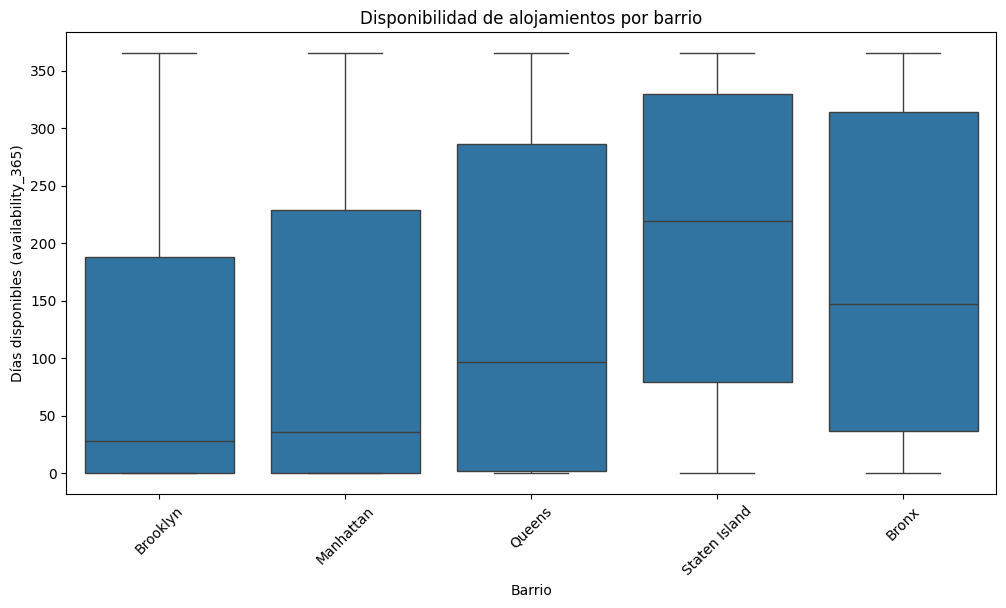

In [17]:
# Gráfico de disponibilidad por grupo de barrios
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df_airbnb)
plt.title('Disponibilidad de alojamientos por barrio')
plt.xlabel('Barrio')
plt.ylabel('Días disponibles (availability_365)')
plt.xticks(rotation=45)
plt.show()

##Análisis de los Gráficos
###Distribución de precios de alojamientos en Airbnb NYC:

Observamos que la mayoría de los alojamientos tienen un precio entre 0 y 200 USD por noche, lo cual es razonable para una ciudad como Nueva York, donde existe una gran oferta en ese rango de precios.
La distribución muestra una cola larga hacia precios más altos, pero estos valores son menos frecuentes, sugiriendo que solo una pequeña cantidad de alojamientos cobran precios significativamente altos (por ejemplo, por encima de 500 USD por noche).

###Distribución de disponibilidad de alojamientos en Airbnb NYC:

La mayoría de los alojamientos tienen baja disponibilidad en el año, con un gran número de ellos disponibles menos de 100 días.
También observamos otro grupo de alojamientos que están disponibles todo el año (365 días), lo cual podría ser una señal de propiedades dedicadas exclusivamente a alquiler en Airbnb y no ocupadas por sus dueños.

###Relación entre tipo de habitación y precio:

Los alojamientos tipo "Entire home/apt" tienden a tener un precio mayor que "Private room" y "Shared room". Esto es intuitivo, ya que un alojamiento completo ofrece más privacidad y espacio que una habitación compartida o privada.
Hay una alta variabilidad en los precios de los "Entire home/apt", mientras que los "Shared room" suelen mantenerse en el rango bajo de precios.

###Disponibilidad de alojamientos por barrio:

En términos de disponibilidad, los barrios de Staten Island y el Bronx parecen tener una disponibilidad media más alta en comparación con Brooklyn y Manhattan. Esto podría sugerir que, en zonas menos céntricas, los alojamientos están disponibles durante más días al año, posiblemente debido a una menor demanda en comparación con los barrios céntricos como Manhattan.

#Conclusión del Notebook
En este notebook, exploramos y procesamos un conjunto de datos de Airbnb en Nueva York. Iniciamos con la limpieza de los datos para manejar valores nulos, duplicados y valores extremos. Luego, aplicamos transformaciones útiles, como la normalización de columnas y la creación de variables adicionales, lo cual facilitó el análisis.

A través de visualizaciones, logramos obtener insights valiosos sobre los precios, tipos de habitación, disponibilidad y diferencias entre barrios. Estos análisis no solo permiten entender mejor el mercado de Airbnb en Nueva York, sino que también sientan las bases para posibles aplicaciones de machine learning, como modelos de predicción de precios o análisis de disponibilidad.